In [23]:
import pandas as pd

Import Covid Data

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")

Adding new cases

In [25]:
df['new_cases'] = df.cases - df.cases.shift().fillna(0)

Creating time series

In [26]:
df.date = pd.to_datetime(df.date)
df.set_index('date',inplace=True)
df['rolling_weekly_avg'] = df.new_cases.rolling(window=7).mean().fillna(0)

Creating data in a readable format for FBProphet

In [27]:
ts = pd.DataFrame({'ds':df.index,'y':df.new_cases})
ts.tail()

,ds,y
date,,
2022-07-19,2022-07-19,160871.0
2022-07-20,2022-07-20,204774.0
2022-07-21,2022-07-21,154076.0
2022-07-22,2022-07-22,165689.0
2022-07-23,2022-07-23,24251.0


Configure model

In [28]:
from prophet import Prophet

In [30]:
prophet = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75)
prophet.fit(ts)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Create future data frame

In [31]:
future = prophet.make_future_dataframe(periods=25)
forecast = prophet.predict(future)

In [50]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(25)

,ds,yhat,yhat_lower,yhat_upper
915,2022-07-24,144421.289078,57623.236807,233384.111887
916,2022-07-25,146275.590118,54498.026839,235518.424279
917,2022-07-26,148282.574275,59440.065116,235180.516518
918,2022-07-27,150444.422624,58757.467923,235318.763851
919,2022-07-28,152759.252282,63824.374900,239684.375402
920,2022-07-29,155221.001248,70560.491010,246427.267533
921,2022-07-30,157819.441397,70105.819078,249227.728856
922,2022-07-31,160540.322073,75655.196002,247725.296399
923,2022-08-01,163365.642683,79964.169699,252885.569560
924,2022-08-02,166274.048559,75329.825005,260176.028927


Plot forecast

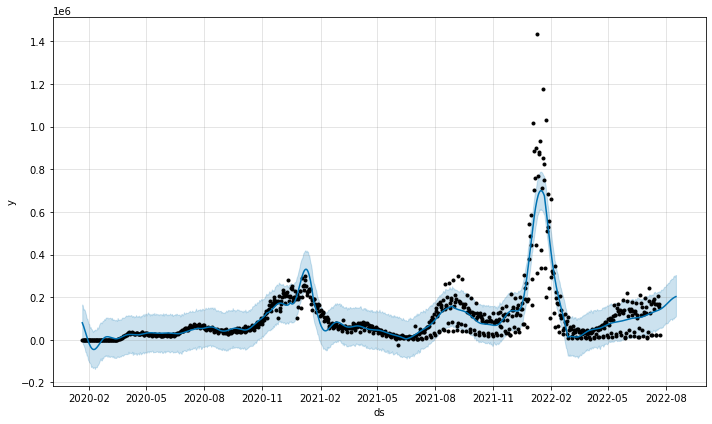

In [33]:
fig = prophet.plot(forecast)

Make an out of sample forecast